<h1>Application of Support Vector Machine on Algorithmic Trading<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span><ul class="toc-item"><li><span><a href="#Technical-Analysis" data-toc-modified-id="Technical-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Technical Analysis</a></span></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Machine Learning</a></span></li></ul></li><li><span><a href="#Stratergy-Scope" data-toc-modified-id="Stratergy-Scope-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stratergy Scope</a></span><ul class="toc-item"><li><span><a href="#Indexes-and-Data-Sources" data-toc-modified-id="Indexes-and-Data-Sources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Indexes and Data Sources</a></span></li><li><span><a href="#Analyzed-Periods" data-toc-modified-id="Analyzed-Periods-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyzed Periods</a></span></li></ul></li><li><span><a href="#Algorithm-Design" data-toc-modified-id="Algorithm-Design-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Algorithm Design</a></span><ul class="toc-item"><li><span><a href="#Quantitative-Algorithms" data-toc-modified-id="Quantitative-Algorithms-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Quantitative Algorithms</a></span></li><li><span><a href="#Machine-Learning-Algorithms" data-toc-modified-id="Machine-Learning-Algorithms-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Machine Learning Algorithms</a></span></li></ul></li><li><span><a href="#Backtesting-Process" data-toc-modified-id="Backtesting-Process-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Backtesting Process</a></span><ul class="toc-item"><li><span><a href="#Up-Trending-Analysis" data-toc-modified-id="Up-Trending-Analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Up Trending Analysis</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Other-indicators" data-toc-modified-id="Other-indicators-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Other indicators</a></span></li><li><span><a href="#Performance-Chart" data-toc-modified-id="Performance-Chart-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Performance Chart</a></span></li></ul></li><li><span><a href="#Down-Trending-Analysis" data-toc-modified-id="Down-Trending-Analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Down Trending Analysis</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Other-indicators" data-toc-modified-id="Other-indicators-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Other indicators</a></span></li><li><span><a href="#Performance-Chart" data-toc-modified-id="Performance-Chart-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Performance Chart</a></span></li></ul></li></ul></li><li><span><a href="#Statistics-Analysis" data-toc-modified-id="Statistics-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Statistics Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Up-Trend" data-toc-modified-id="Up-Trend-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Up Trend</a></span></li><li><span><a href="#Down-Trend" data-toc-modified-id="Down-Trend-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Down Trend</a></span></li></ul></li></ul></li></ul></div>

The following research replicates the paper **_Application of Support Vector Machine on Algorithmic Trading_** published on _Int'l Conf. Artificial Intelligence (ICAI'18)_. The paper provides a thoughtful analysis regarding the use of machine learning techniques applied to algorithmic trading using common indexes such as the S&P500 and the Chicago Board Options Exchange Market Volatility Index (VIX). A trading simulation is carried out in order to test the efficiency of the algorithms in up trending and down trending periods. Statistical and economic performance measures are obtained and compared in order to discuss the most effective technique. The inputs used in the analysis are well-known quantitative indicators such as the Relative Strength Index and the Moving Average Convergence-Divergence. The relevance of the results lies in the use of separated training models for each kind of trend.

**Keywords:** Support Vector Machines, Quantitative trading, VIX, Machine learning, ADX, RSI.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from pyfunc import RSI, MACD, ml_input, ml_output, rsi_cal, macd_cal, mom_cal, rf_analysis, backtester, AnnualizedReturn, AnnualizedVolatility, SharpeRatio, MaxDrawdown, CalulateStatistics 
from sklearn import preprocessing
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None

# Background
In this section, the relevant literature regarding technical analysis and machine learning is presented.

## Technical Analysis

The technical indicators that are used are the following ones.

- The Relative Strength Index (RSI) is an oscillator that compares the magnitude of a stock's recent gains to the magnitude of its recent losses and turns that information into a number that ranges from 0 to 100.

$$RSI = 100 - \frac{100}{1+RS}$$
$$RS = \frac{Avg.Gain}{Avg.Loss}$$
$$Avg = [(prev.Avg)*(n-1)+curr.Avg]/n$$

- The Moving Average Convergence Divergence (MACD) is an oscillator that turns two moving averages (Eq. 2a), into a momentum oscillator by subtracting the longer moving average from the shorter moving average. It also relies in a third moving average called the MACD line in order to trigger the operation signals.

$$MA(n)=\frac{1}{n}x\sum_{i=0}^{n-1}P_{m-i}$$
$$MACD = MA(n_{fast})-MA(n_{slow}) | Line=MA(n_{line})$$

- The momentum is an oscillator designed to identify the speed (or strength) of price movement. It simply deducts the current closing price minus the closing price n days ago, being n a user-defined parameter. 
$$Mom=Price(today)-Price(n  days   ago)$$

## Machine Learning

Several authors have discussed the use of machine learning techniques in quantitative trading. The techniques that are used in this paper are the following ones.

- Random Forest (RF) is a supervised classification algorithm which is based in the generation of a random number of decision trees. As opposing to a single decision tree method, the information gain ratio is not taken in consideration, but the result of a voting algorithm using random test data is obtained instead.

- Support Vector Machines (SVM) are classification or regression methods of supervised learning based in the construction a hyperplane as the decision surface. This hyperplane can be built by the use of kernel functions, which are functions that transform a vector space in another one of superior dimension. Equation represents the problem that SVM must resolve, being $\omega$ the normal vector to the hyperplane, and C the cost of misclassification.
$$min\{{\frac{1}{2}\|\omega\|^2+C\sum}\xi_i\}$$
$$y_i(\omega*x_i-b)\geq 1-\xi_i, \xi_i>0 $$

# Stratergy Scope

## Indexes and Data Sources

The proposed system has been designed as a mid-term strategy, rather than an intraday system, due to the cost of the real time data needed for the intraday one. The strategy presented in this paper is recommended for the index S&P500 due to the relationship with the VIX index which is also studied. The data from both indexes is obtained from Yahoo Finance.

In [2]:
GSPC = yf.download("^GSPC", start="1999-04-01", end="2019-10-09", interval = "1d")
VIX = yf.download("^VIX", start="1999-04-01", end="2019-10-09", interval = "1d")

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [3]:
GSPC_Close = GSPC[['Close']].values.astype(float)
VIX_Close = VIX[['Close']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()
GSPC_scaled = min_max_scaler.fit_transform(GSPC_Close)
VIX_scaled = min_max_scaler.fit_transform(VIX_Close)

In [4]:
clean_data = pd.DataFrame(index=GSPC.index, data=GSPC_scaled, columns=['S&P500'])
clean_data['VIX'] = VIX_scaled

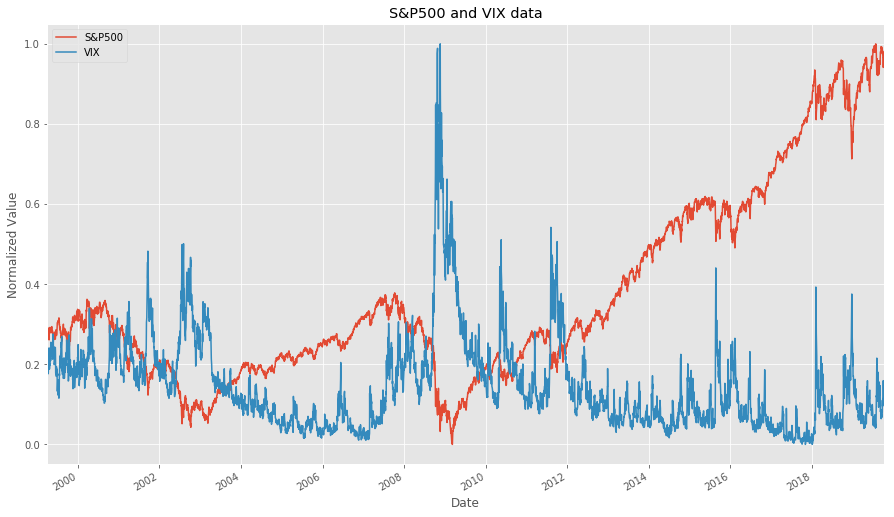

In [5]:
# Closing value of the S&P500 and VIX.
ax = clean_data.plot(figsize=(15,9), title = 'S&P500 and VIX data')
_ = ax.set_ylabel("Normalized Value")

## Analyzed Periods

The presented strategy requires at least four periods for the testing phase, two training and two testing periods, although it is advisable to use more periods, the research has been conducted using only two due to time constraints.
The periods selected are presented in the table.

| Period                 | Start Date     | End Date   |
|:----------------------:|:--------------:|:----------:|
| Up trending training   | 14/02/2003     | 09/10/2007 |
| Down trending training | 01/09/2000     | 13/02/2003 |
| Up trending test       | 09/04/2009     | 20/03/2010 |
| Down trending test     | 09/10/2007     | 26/09/2008 |

In [6]:
train_GSPC_up, train_VIX_up = GSPC.loc['20030214':'20071009'], VIX.loc['20030214':'20071009']
train_GSPC_down, train_VIX_down = GSPC.loc['20000901':'20030213'], VIX.loc['20000901':'20030213']
test_GSPC_up, test_VIX_up = GSPC.loc['20090409':'20100326'], VIX.loc['20090409':'20100326']
test_GSPC_down, test_VIX_down = GSPC.loc['20071009':'20080926'], VIX.loc['20071009':'20080926']

# Algorithm Design
## Quantitative Algorithms

The quantitative algorithms follow the same structure: each one of them returns an indicator with a value inside a specific range. The selling (buying) orders will get triggered when that value crosses above (or below) a threshold. The algorithm will finally output a vector of trading orders (+1) for purchases and (-1) for sales that will be later evaluated by a backtester module.

We've trained the module with different threshold several times to decide the one used in our paper. Table II shows the trading rules for each one of the quantitative algorithms.

| Indicator   | Purchase TH.  | Sale TH.   | Other Value |
|:-----------:|:-------------:|:----------:|:-----------:|
|  RSI        |   30          |   70       | N=14        |
|  MACD       |   >0          |   <0       | -           |
| Momemtum    |   15          |   85       | N=12        |


## Machine Learning Algorithms

Machine learning algorithms require a different approach. In first place, a training process is performed. This training is equal for every machine learning algorithm used in this paper, including SVM one. This training requires a set of inputs and an expected output for the training period. The 10 inputs to the training are the following ones:

- RSI (14) at close.
- RSI (14) at previous day’s close.
- RSI (14) at previous two day’s close.
- MACD (26, 12, 9) at close.
- MACD (26, 12, 9) at previous day’s close. MACD (26, 12, 9) at previous two days’ close. VIX data at close.
- VIX data at previous day’s close.
- VIX data at previous two day’s close.
- S&P500 change at close.

An expected output is also needed in order to feed the training process. This output is obtained by designing a special algorithm which runs taking in consideration the whole training data vector (making it non-realistic for a test period). The trading rules used by the algorithm are as follows: **_“Purchase orders are generated when the price from five days later has increased, whereas, sell orders are generated when it has decreased”._**

Table shows the selected thresholds that were obtained during the optimization process, these thresholds are the minimum percentage of likelihood for each order type.

| Technique   | Purchase TH.  | Sale TH.   | Other Value           |
|:-----------:|:-------------:|:----------:|:---------------------:|
|Random Forest|   55%         |   30%      | Number of tress = 100 |


|  SVM Parameter     |   Value                    | 
|:------------------:|:--------------------------:|
|  C                 |   100                      |
|  Lambda            | 0.0001(Up), 0.0000001(Down)|
|  Kernal            | Radial Basis Function (RFB)|

The training is performed for both up trending and down trending period and is stored in two separated matrixes.

In [7]:
X_train_up = ml_input(train_GSPC_up, train_VIX_up, trend='up', types='train')
y_train_up = ml_output(train_GSPC_up)

X_test_up = ml_input(test_GSPC_up, test_VIX_up, trend='up', types='test')
y_test_up = ml_output(test_GSPC_up)

X_train_down = ml_input(train_GSPC_down, train_VIX_down, trend='down', types='train')
y_train_down = ml_output(train_GSPC_down)

X_test_down = ml_input(test_GSPC_down, test_VIX_down, trend='down', types='test')
y_test_down = ml_output(test_GSPC_down)

In [8]:
X_train_up.head()

RSI     RSI_p1     RSI_p2       MACD    MACD_p1    MACD_p2  \
Date                                                                           
2003-03-25  67.310957  65.310443  78.748306  11.393296  10.680203  10.684797   
2003-03-26  65.458175  67.310957  65.310443  11.440041  11.393296  10.680203   
2003-03-27  64.883978  65.458175  67.310957  11.232220  11.440041  11.393296   
2003-03-28  62.801318  64.883978  65.458175  10.540939  11.232220  11.440041   
2003-03-31  56.808465  62.801318  64.883978   8.657104  10.540939  11.232220   

              VIX  VIX_p1  VIX_p2  S&P_change  
Date                                           
2003-03-25  28.75   30.39   28.67       10.51  
2003-03-26  28.23   28.75   30.39       -4.79  
2003-03-27  27.96   28.23   28.75       -1.43  
2003-03-28  27.75   27.96   28.23       -5.02  
2003-03-31  29.15   27.75   27.96      -15.32

# Backtesting Process

To evaluate the proposed algorithms a backtester system is designed. _Backtester_ is a tool that can output performance measures receiving as inputs the price data and the algorithm order vectors. _Backtester_ must be configured with an initial capital input and commissions, which are chosen to be **10000$ and 0.35 percentage** of the cost from each operation, as it is an average value for brokerage fees. Also the backtester requires a logic in order to perform the operations. In this research, the chosen logic is as follows:

_“In up trending markets, there can be only **one** long operation ongoing that must be exited in order to start a new one, in down trending markets there can be only **one** short operation on going that must be exited in order to start a new one. In either situation, the operation must be opened with the total capital available in the account at each moment”._

This module also provides the performance of the **Buy and Hold (BH) strategy** as a benchmark for the evaluation. BH strategy uses the following rule: _“A purchase is made during the first day of evaluation and sale is made at last day”_.

## Up Trending Analysis
### Random Forest

In [9]:
rf = rf_analysis(X_train_up, y_train_up)
X_train_up_pred_rf = rf.predict(X_train_up.values)
X_test_up_pred_rf = rf.predict(X_test_up.values)
prob = rf.predict_proba(X_train_up.values)
rf.classes_

array([-1,  1])

### SVM

In [10]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [11]:
kernel = 'rbf'
C = 100
gamma = 0.0001

svm = SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
kmeans = KMeans(n_clusters=6).fit(X_train_up.values)
distances = np.column_stack([np.sum((X_train_up.values - center)**2, axis=1)**0.5 for center in kmeans.cluster_centers_])

In [12]:
svm.fit(distances, y_train_up.values.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
kmeans = KMeans(n_clusters=6).fit(X_test_up.values)
distances = np.column_stack([np.sum((X_test_up.values - center)**2, axis=1)**0.5 for center in kmeans.cluster_centers_])
X_test_up_pred_svm = svm.predict(distances)

### Other indicators

In [14]:
X_up = X_test_up.copy(deep=True)

In [15]:
test_GSPC_up.loc[:,'Close_p12'] = test_GSPC_up['Close'].shift(12)
test_GSPC_up.loc[:,'Mom'] = test_GSPC_up['Close']-test_GSPC_up['Close_p12']
test_GSPC_up.drop(index=test_GSPC_up.index[:26], inplace=True)
test_GSPC_up.drop(index=test_GSPC_up.index[-5:], inplace=True)

In [16]:
X_up['RSI_order'] = X_up.apply(rsi_cal, axis=1)
X_up['MACD_order'] = X_up.apply(macd_cal, axis=1)
X_up['Mom_order'] = test_GSPC_up.apply(mom_cal, axis=1)

In [17]:
X_up.describe()

RSI      RSI_p1      RSI_p2        MACD     MACD_p1     MACD_p2  \
count  212.000000  212.000000  212.000000  212.000000  212.000000  212.000000   
mean    57.522228   57.439924   57.348275    8.101091    8.074270    8.055637   
std      9.640769    9.613645    9.537998    8.331176    8.314085    8.299904   
min     33.301494   33.301494   33.301494  -14.388915  -14.388915  -14.388915   
25%     51.804318   51.804318   51.804318    3.683327    3.683327    3.683327   
50%     58.791758   58.686446   58.597220    9.467833    9.467833    9.467833   
75%     64.131724   63.864467   63.769829   14.220439   14.150272   14.003161   
max     75.801736   75.801736   75.801736   23.131008   23.131008   23.131008   

              VIX      VIX_p1      VIX_p2  S&P_change   RSI_order  MACD_order  \
count  212.000000  212.000000  212.000000  212.000000  212.000000  212.000000   
mean    24.123585   24.199764   24.269340    1.306698   -0.089623    0.660377   
std      3.772035    3.789917    3.785496   11.096311    0.286316    0.752711   
min     16.620000   16.620000   16.910000  -34.170000   -1.000000   -1.000000   
25%     21.490000   21.565000   21.597500   -3.532500    0.000000    1.000000   
50%     24.255000   24.275000   24.295000    2.425000    0.000000    1.000000   
75%     26.127500   26.190000   26.230000    7.670000    0.000000    1.000000   
max     32.680000   33.120000   33.120000   26.840000    0.000000    1.000000   

        Mom_order  
count  212.000000  
mean     0.433962  
std      0.533590  
min     -1.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [18]:
X_up[['RSI_order','MACD_order','Mom_order']]

RSI_order  MACD_order  Mom_order
Date                                        
2009-05-18          0           1          0
2009-05-19          0           1          0
2009-05-20          0           1          1
2009-05-21          0           1          1
2009-05-22          0           1          1
...               ...         ...        ...
2010-03-15          0           1          0
2010-03-16         -1           1          0
2010-03-17         -1           1          0
2010-03-18         -1           1          0
2010-03-19          0           1          0

[212 rows x 3 columns]

### Performance Chart

In [19]:
initial_cap = 10000
commission = 0.0035

In [20]:
prices = test_GSPC_up[['Open', 'Close']]
prices.drop(index=prices.index[:26], inplace=True)
prices.drop(index=prices.index[-5:], inplace=True)

In [21]:
rf_orders_up = X_test_up_pred_rf
svm_orders_up = X_test_up_pred_svm

In [22]:
rsi_orders_up = X_up['RSI_order'].values
macd_orders_up = X_up['MACD_order'].values
mom_orders_up = X_up['Mom_order'].values

In [23]:
rf_capitals_up = backtester(prices.values, rf_orders_up, trend='up')
svm_capitals_up = backtester(prices.values, svm_orders_up, trend='up')

In [24]:
mom_capitals_up = backtester(prices.values, mom_orders_up, trend='up')
macd_capitals_up = backtester(prices.values, macd_orders_up, trend='up')
rsi_capitals_up = backtester(prices.values, rsi_orders_up, trend='up')

In [25]:
BH_capitals_up = backtester(prices.values, np.ones(rf_orders_up.shape), trend='up')

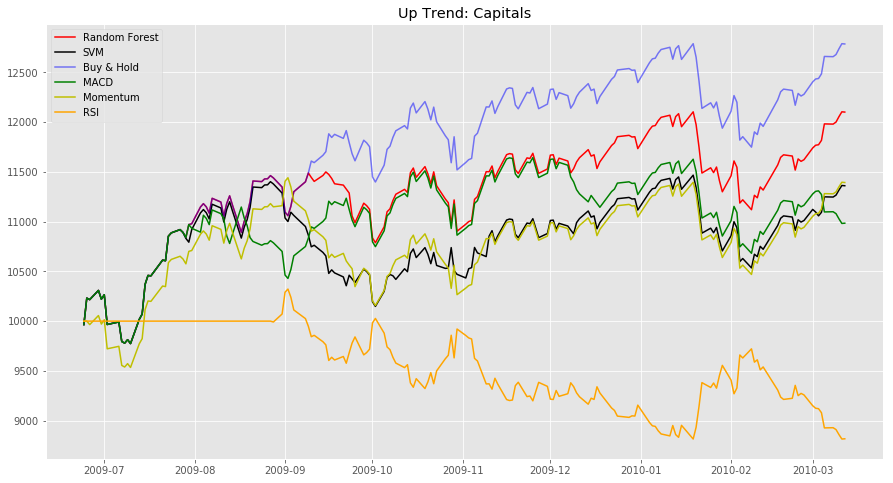

In [26]:
_ = plt.figure(figsize=(15,8))
_ = plt.plot(prices.index, rf_capitals_up, label='Random Forest', color='r')
_ = plt.plot(prices.index, svm_capitals_up, label='SVM', color='k')
_ = plt.plot(prices.index, BH_capitals_up, label='Buy & Hold', color='b', alpha=0.5)
_ = plt.plot(prices.index, macd_capitals_up, label='MACD', color='g')
_ = plt.plot(prices.index, mom_capitals_up, label='Momentum', color='y')
_ = plt.plot(prices.index, rsi_capitals_up, label='RSI', color='orange')
_ = plt.title('Up Trend: Capitals')
_ = plt.legend()

## Down Trending Analysis

### Random Forest

In [27]:
rf = rf_analysis(X_train_down, y_train_down)
X_train_down_pred_rf = rf.predict(X_train_down.values)
X_test_down_pred_rf = rf.predict(X_test_down.values)
prob = rf.predict_proba(X_train_down.values)

### SVM

In [28]:
svm = SVC(kernel=kernel, C=C, gamma=0.0000001, probability=True)

In [29]:
kmeans = KMeans(n_clusters=6).fit(X_train_down.values)
distances = np.column_stack([np.sum((X_train_down.values - center)**2, axis=1)**0.5 for center in kmeans.cluster_centers_])

In [30]:
svm.fit(distances, y_train_down.values.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
kmeans = KMeans(n_clusters=6).fit(X_test_down.values)
distances = np.column_stack([np.sum((X_test_down.values - center)**2, axis=1)**0.5 for center in kmeans.cluster_centers_])

In [32]:
X_test_down_pred_svm = svm.predict(distances)

### Other indicators

In [33]:
X_down = X_test_down.copy(deep=True)
test_GSPC_down.loc[:,'Close_p12'] = test_GSPC_down['Close'].shift(12)
test_GSPC_down.loc[:,'Mom'] = test_GSPC_down['Close']-test_GSPC_down['Close_p12']
test_GSPC_down.drop(index=test_GSPC_down.index[:26], inplace=True)
test_GSPC_down.drop(index=test_GSPC_down.index[-5:], inplace=True)

In [34]:
X_down['RSI_order'] = X_down.apply(rsi_cal, axis=1)
X_down['MACD_order'] = X_down.apply(macd_cal, axis=1)
X_down['Mom_order'] = test_GSPC_down.apply(mom_cal, axis=1)

### Performance Chart

In [35]:
prices = test_GSPC_down[['Open', 'Close']]
prices.drop(index=prices.index[:26], inplace=True)
prices.drop(index=prices.index[-5:], inplace=True)

In [36]:
rf_orders_down = X_test_down_pred_rf
svm_orders_down = X_test_down_pred_svm

In [37]:
macd_orders_down = X_down['MACD_order'].values
mom_orders_down = X_down['Mom_order'].values
rsi_orders_down = X_down['RSI_order'].values

In [38]:
mom_capitals_down = backtester(prices.values, mom_orders_down, trend='down')
macd_capitals_down = backtester(prices.values, macd_orders_down, trend='down')
rsi_capitals_down = backtester(prices.values, rsi_orders_down, trend='down')

In [39]:
rf_capitals_down = backtester(prices.values, rf_orders_down, trend='down')
svm_capitals_down = backtester(prices.values, svm_orders_down, trend='down')

In [40]:
BH_capitals_down = backtester(prices.values, np.ones(rf_orders_down.shape), trend='down')

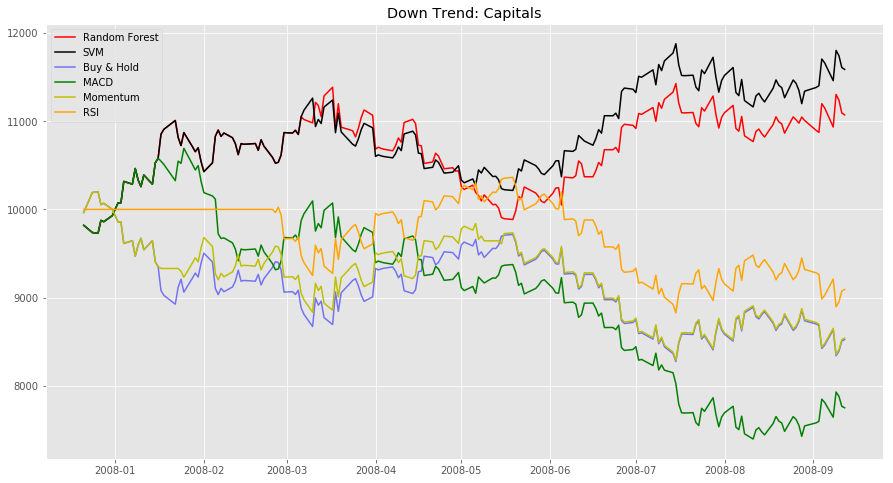

In [41]:
_ = plt.figure(figsize=(15,8))
_ = plt.plot(prices.index, rf_capitals_down, label='Random Forest', color='r')
_ = plt.plot(prices.index, svm_capitals_down, label='SVM', color='k')
_ = plt.plot(prices.index, BH_capitals_down, label='Buy & Hold', color='b', alpha=0.5)
_ = plt.plot(prices.index, macd_capitals_down, label='MACD', color='g')
_ = plt.plot(prices.index, mom_capitals_down, label='Momentum', color='y')
_ = plt.plot(prices.index, rsi_capitals_down, label='RSI', color='orange')
_ = plt.title('Down Trend: Capitals')
_ = plt.legend()

# Statistics Analysis

The measures used in this paper are the following ones.

- The _return_ (R) is obtained subtracting the equity of each day from evaluation period. It is also presented as a percentage over the base capital, adding the sum of returns and subtracting them from the initial capital set.

- The _Sharpe Ratio_ (SR) is a measure of risk of the investment which is calculated as the returns divided by their standard deviation.

- The _Maximum Drawdown_ (MDD) is a measure of risk which displays the biggest performance fall of the return. It is calculated by subtracting the peak minus the valley after each fall, and getting the maximum from them.

- The _volatility_ (Vol) is a measure of risk which displays the variation of the returns over time. It is calculated as the standard deviation of the return divided by their mean.

R and SR are required to be as high as possible, with a negative cipher denoting loss, and a positive one denoting benefit. MDD and Vol are required to be as low as possible, and must be necessarily positive numbers. They are usually presented in percentage.

### Up Trend

In [42]:
stat_svm_up = CalulateStatistics(svm_capitals_up, 'SVM')
stat_rf_up = CalulateStatistics(rf_capitals_up, 'Random Forest')
stat_bh_up = CalulateStatistics(BH_capitals_up, 'Buy & Hold')
stat_macd_up = CalulateStatistics(macd_capitals_up, 'MACD')
stat_mom_up = CalulateStatistics(mom_capitals_up, 'Momentum')
stat_rsi_up = CalulateStatistics(rsi_capitals_up, 'RSI')

In [43]:
pd.concat([stat_bh_up, stat_svm_up, stat_rf_up,
            stat_mom_up, stat_macd_up, stat_rsi_up])

Annualized Return(%)  Annualized Volatility(%)  Sharpe Ratio  \
Buy & Hold                64.132648                 16.727051      3.834068   
SVM                       29.335616                 16.278169      1.802145   
Random Forest             46.894803                 16.744431      2.800621   
Momentum                  30.085730                 16.568537      1.815835   
MACD                      20.842352                 16.678715      1.249638   
RSI                      -22.412253                 15.111034     -1.483171   

               Max Drawdown(%)  
Buy & Hold            8.127940  
SVM                  10.992216  
Random Forest         8.127940  
Momentum             11.224519  
MACD                  8.261639  
RSI                  14.601654

### Down Trend

In [44]:
stat_svm_down = CalulateStatistics(svm_capitals_down, 'SVM')
stat_rf_down = CalulateStatistics(rf_capitals_down, 'Random Forest')
stat_bh_down = CalulateStatistics(BH_capitals_down, 'Buy & Hold')
stat_macd_down = CalulateStatistics(macd_capitals_down, 'MACD')
stat_mom_down = CalulateStatistics(mom_capitals_down, 'Momentum')
stat_rsi_down = CalulateStatistics(rsi_capitals_down, 'RSI')

In [45]:
pd.concat([stat_svm_down, stat_rf_down, stat_rsi_down,
           stat_mom_down, stat_bh_down, stat_macd_down])

Annualized Return(%)  Annualized Volatility(%)  Sharpe Ratio  \
SVM                       34.166874                 18.612104      1.835734   
Random Forest             22.513538                 19.211559      1.171875   
RSI                      -17.277333                 18.880273     -0.915100   
Momentum                 -26.989717                 21.004611     -1.284943   
Buy & Hold               -27.266837                 21.619634     -1.261207   
MACD                     -39.854965                 21.772600     -1.830510   

               Max Drawdown(%)  
SVM                   9.300385  
Random Forest        13.175731  
RSI                  14.840568  
Momentum             18.724637  
Buy & Hold           18.879452  
MACD                 30.832808